In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
data=pd.read_csv(r"C:\Users\DHINESH\Desktop\Semester 5\17MDC55 - HRSD Lab\Dataset\job.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [301]:
print(data.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [302]:
print(data.isna().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [303]:
data=data.drop(["city","enrollee_id"],axis=1)
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Visualisation of the dataset

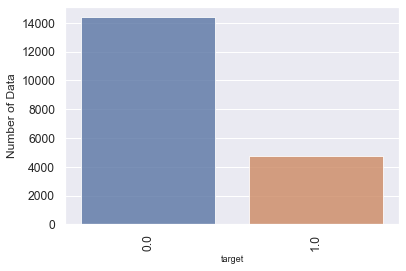

In [304]:
tar = data['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(tar.index, tar.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show();

### Pre-processing of the dataset
Converting the non-numeric text to numerics.
In this, we convert the non-numeric attributes to numeric which are gender, relevant_experience, enrollment, education level, major, experience, company type, company size, last job

In [305]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience_to_numeric(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment_to_numeric(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course': return 1 
    if x=='Part time course': return 2 

def edu_level_to_numeric(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major_to_numeric(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 

def experience_to_numeric(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21

def company_t_to_numeric(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s_to_numeric(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job_to_numeric(x):
    if x=='never'        :   return 0 
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4
    if x=='>4'           :   return 5 

In [306]:
data['gender'] = data['gender'].apply(gender_to_numeric)
data['relevent_experience'] = data['relevent_experience'].apply(rel_experience_to_numeric)
data['enrolled_university'] = data['enrolled_university'].apply(enrollment_to_numeric)
data['education_level'] = data['education_level'].apply(edu_level_to_numeric)
data['major_discipline'] = data['major_discipline'].apply(major_to_numeric)
data['experience'] = data['experience'].apply(experience_to_numeric)
data['company_type'] = data['company_type'].apply(company_t_to_numeric)
data['company_size'] = data['company_size'].apply(company_s_to_numeric)
data['last_new_job'] = data['last_new_job'].apply(last_job_to_numeric)

data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0


Replacing the NaN values with mean

In [307]:
data['gender'] = data['gender'].fillna((data['gender'].mean()))
data['enrolled_university'] = data['enrolled_university'].fillna((data['enrolled_university'].mean()))
data['major_discipline'] = data['major_discipline'].fillna((data['major_discipline'].mean()))
data['company_size'] = data['company_size'].fillna((data['company_size'].mean()))
data['company_type'] = data['company_type'].fillna((data['company_type'].mean()))
data['education_level'] = data['education_level'].fillna((data['education_level'].mean()))
data['last_new_job'] = data['last_new_job'].fillna((data['last_new_job'].mean()))
data['experience'] = data['experience'].fillna((data['experience'].mean()))

data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.000000,1,0.000000,0.0,0.0,21.0,3.27466,0.690966,1.0,36,1.0
1,0.776,1.000000,0,0.000000,0.0,0.0,15.0,5.00000,0.000000,5.0,47,0.0
2,0.624,1.071468,0,1.000000,0.0,0.0,5.0,3.27466,0.690966,0.0,83,0.0
3,0.789,1.071468,0,0.327775,0.0,1.0,0.0,3.27466,0.000000,0.0,52,1.0
4,0.767,1.000000,1,0.000000,1.0,0.0,21.0,5.00000,1.000000,4.0,8,0.0


In [308]:
X, Y = data.drop(["target"],axis=1),data["target"]

Calculating Variance Inflation Factor for each attribute

In [309]:
def vif_calculation(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
vif_calculation(X)

,variables,VIF
0,city_development_index,22.040560
1,gender,13.577965
2,relevent_experience,4.291665
3,enrolled_university,1.445669
4,education_level,1.529960
5,major_discipline,1.143516
6,experience,4.984367
7,company_size,4.860325
8,company_type,1.376753
9,last_new_job,3.220707


Removing city_development_index and gender since they have high multicollinearity

In [310]:
data=data.drop(["city_development_index","gender"],axis=1)
data

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...
19153,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,train_size=0.7)

In [312]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)
accuracy_score(y_test, pred1)

C:\Users\DHINESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7668754349338901

In [313]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred2=dtc.predict(X_test)
accuracy_score(y_test, pred2)

0.7160751565762005

In [314]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
pred3=rf.predict(X_test)
accuracy_score(y_test, pred3)

0.7837508698677801